In this collab document, I have a large dataset (movies.csv) that includes:




*  
 -Movie title  
-Rating
-Genre
-Year
-IMDB score
-Director
-Writer
-Star
-Country
-Budget
-Revenue
-Company
-Runtime
  
as the columns for more than 8000+ different movies


***Hypothesis tests and conlcusions are placed below and above the graphs.***

**Exploratory Data Analysis for the effect of director on IMDB rating.**

-

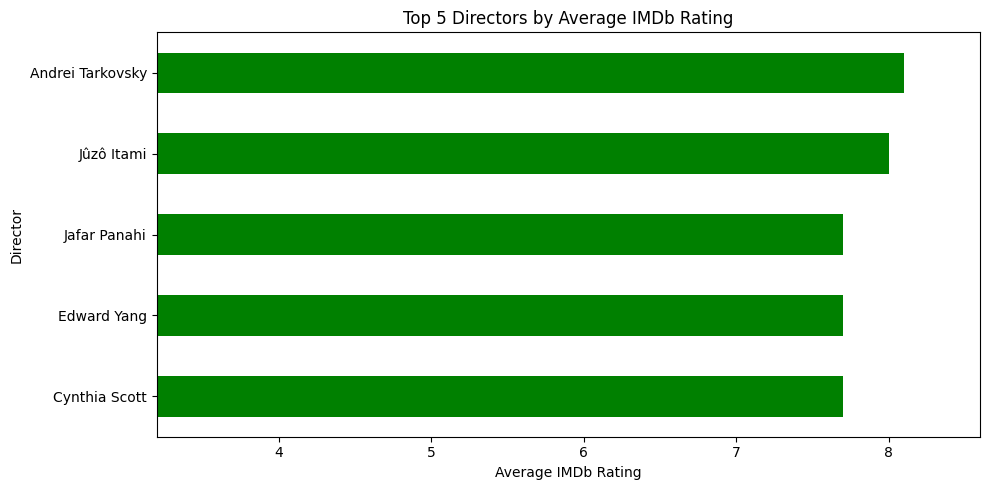

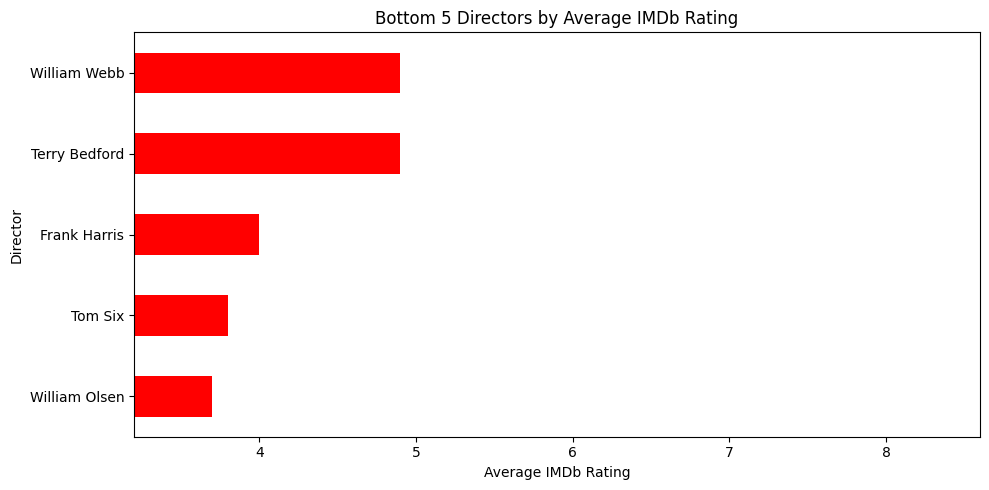


ANOVA Test Results:
F-statistic: 0.0444
p-value: 0.85255804

The ANOVA test is not statistically significant (p >= 0.05).
This suggests that there are no significant differences in IMDb ratings among different directors.

Number of directors included in ANOVA (with at least 2 films): 2


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

file_path = "/content/movies.csv"
df = pd.read_csv(file_path, on_bad_lines='skip', encoding='utf-8')


df_director_score = df[['director', 'score']].dropna()
df_director_score['score'] = pd.to_numeric(df_director_score['score'], errors='coerce')
df_director_score = df_director_score.dropna()

director_avg_scores = df_director_score.groupby('director')['score'].mean().reset_index()
director_avg_scores.columns = ['director', 'avg_score']

top5_directors = director_avg_scores.sort_values(by='avg_score', ascending=False).head(5).set_index('director')
bottom5_directors = director_avg_scores.sort_values(by='avg_score', ascending=True).head(5).set_index('director')

grouped_directors = df_director_score.groupby('director')
valid_groups = [group['score'].values for _, group in grouped_directors if len(group) >= 2]
anova_result = f_oneway(*valid_groups)
f_stat = anova_result.statistic
p_val = anova_result.pvalue


x_min = min(bottom5_directors['avg_score'].min(), top5_directors['avg_score'].min()) - 0.5
x_max = max(bottom5_directors['avg_score'].max(), top5_directors['avg_score'].max()) + 0.5

plt.figure(figsize=(10, 5))
top5_directors['avg_score'].sort_values().plot(kind='barh', color='green')
plt.xlim(x_min, x_max)
plt.title('Top 5 Directors by Average IMDb Rating')
plt.xlabel('Average IMDb Rating')
plt.ylabel('Director')
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 5))
bottom5_directors['avg_score'].sort_values().plot(kind='barh', color='red')
plt.xlim(x_min, x_max)
plt.title('Bottom 5 Directors by Average IMDb Rating')
plt.xlabel('Average IMDb Rating')
plt.ylabel('Director')
plt.tight_layout()
plt.show()


print("\nANOVA Test Results:")
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_val:.8f}")

alpha = 0.05
if p_val < alpha:
    print("\nThe ANOVA test is statistically significant (p < 0.05).")
    print("This suggests that there are significant differences in IMDb ratings among different directors.")
else:
    print("\nThe ANOVA test is not statistically significant (p >= 0.05).")
    print("This suggests that there are no significant differences in IMDb ratings among different directors.")


**Exploratory Data Analysis for the effect of genre on IMDB rating.**

Hypothesis Test: Does genre affect IMDb scores?
H₀: All genres have the same average IMDb score
H₁: At least one genre has a different average IMDb score

ANOVA F-statistic: 2.2847
p-value: 0.050509

Average IMDb Score by Genre
H₀: All genres have the same average IMDb score
H₁: At least one genre has a different average IMDb score



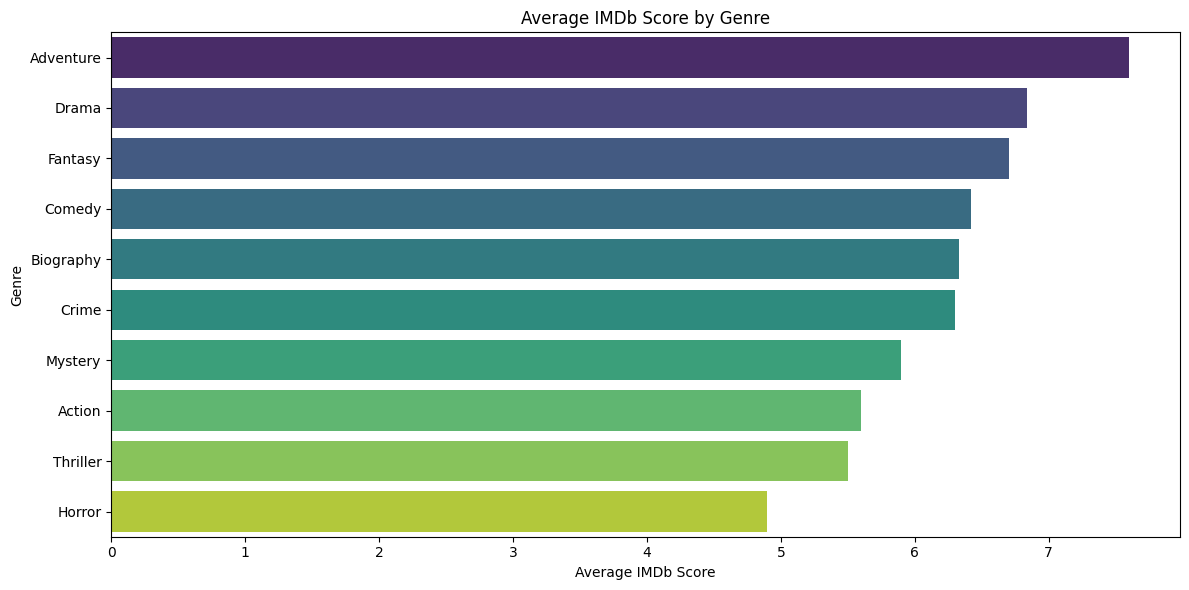

Conclusion: Since the p-value is greater than 0.05, we fail to reject the null hypothesis.
→ There is no statistically significant difference in IMDb scores across genres.


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

df_genre = df.dropna(subset=['genre', 'score']).copy()
df_genre.loc[:, 'score'] = pd.to_numeric(df_genre['score'], errors='coerce')
df_genre = df_genre.dropna(subset=['score'])

groups_genre = [group['score'].values for _, group in df_genre.groupby('genre') if len(group) > 1]


print("Hypothesis Test: Does genre affect IMDb scores?")
print("H₀: All genres have the same average IMDb score")
print("H₁: At least one genre has a different average IMDb score\n")

anova_result_genre = f_oneway(*groups_genre)
f_stat_genre = anova_result_genre.statistic
p_val_genre = anova_result_genre.pvalue

print(f"ANOVA F-statistic: {f_stat_genre:.4f}")
print(f"p-value: {p_val_genre:.6f}\n")

genre_stats = (
    df_genre.groupby('genre')['score']
    .agg(appearances='count', avg_score='mean')
    .reset_index()
    .sort_values(by='avg_score', ascending=False)
)

print("Average IMDb Score by Genre")
print("H₀: All genres have the same average IMDb score")
print("H₁: At least one genre has a different average IMDb score\n")

plt.figure(figsize=(12, 6))
sns.barplot(data=genre_stats, x='avg_score', y='genre', hue='genre', palette='viridis', dodge=False, legend=False)
plt.xlabel('Average IMDb Score')
plt.ylabel('Genre')
plt.title('Average IMDb Score by Genre')
plt.tight_layout()
plt.show()


if p_val_genre < 0.05:
    print("Conclusion: Since the p-value is less than 0.05, we reject the null hypothesis.")
    print("→ There is a statistically significant difference in IMDb scores across genres.")
else:
    print("Conclusion: Since the p-value is greater than 0.05, we fail to reject the null hypothesis.")
    print("→ There is no statistically significant difference in IMDb scores across genres.")


**Exploratory Data Analysis for the effect of country on IMDB rating.**

Hypothesis Test: Do countries differ in their average IMDb scores?
H₀: All countries have the same average IMDb score
H₁: At least one country has a different average IMDb score

ANOVA F-statistic: 5.8021
p-value: 0.000797

Conclusion: Since the p-value is less than 0.05, we reject the null hypothesis.
→ There is a statistically significant difference in IMDb scores across countries.



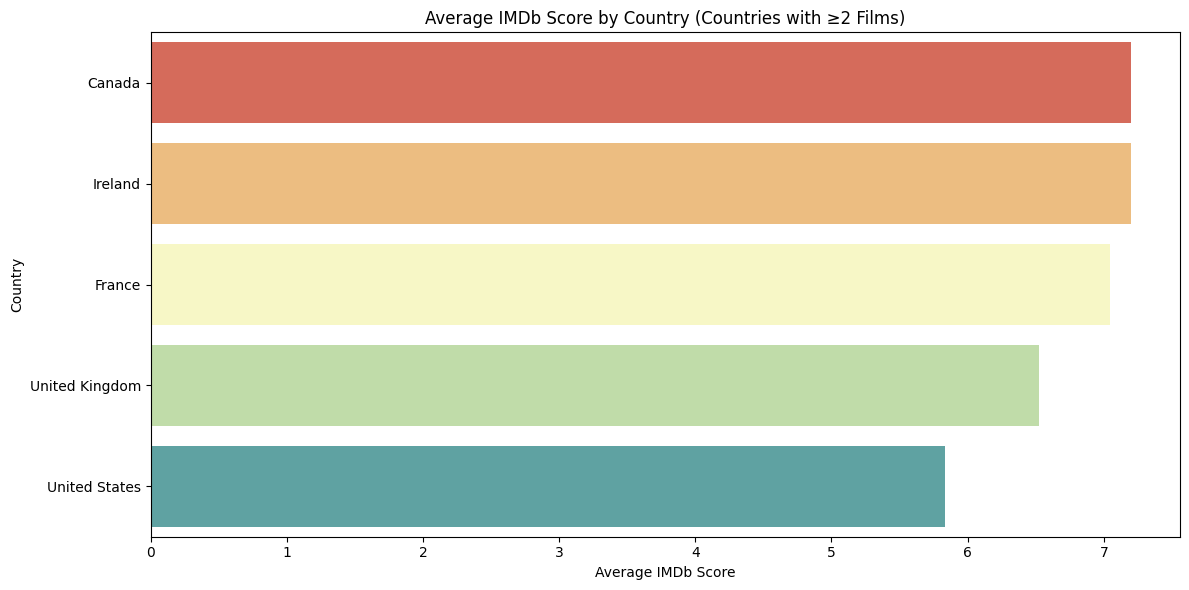

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

with open('/content/movies.csv', 'r', encoding='utf-8') as f:
    header = f.readline().strip().split(',')
df = pd.read_csv('/content/movies.csv', skiprows=1, names=header, on_bad_lines='skip')

df_country_score = df[['country', 'score']].dropna().copy()
df_country_score['score'] = pd.to_numeric(df_country_score['score'], errors='coerce')
df_country_score = df_country_score.dropna()

print("Hypothesis Test: Do countries differ in their average IMDb scores?")
print("H₀: All countries have the same average IMDb score")
print("H₁: At least one country has a different average IMDb score\n")

grouped_all = df_country_score.groupby('country')
valid_country_groups = [group['score'].values for name, group in grouped_all if len(group) >= 2]

anova_all = f_oneway(*valid_country_groups)
f_stat_all = anova_all.statistic
p_val_all = anova_all.pvalue


print(f"ANOVA F-statistic: {f_stat_all:.4f}")
print(f"p-value: {p_val_all:.6f}\n")

if p_val_all < 0.05:
    print("Conclusion: Since the p-value is less than 0.05, we reject the null hypothesis.")
    print("→ There is a statistically significant difference in IMDb scores across countries.\n")
else:
    print("Conclusion: Since the p-value is greater than 0.05, we fail to reject the null hypothesis.")
    print("→ There is no statistically significant difference in IMDb scores across countries.\n")


country_avg_all = (
    df_country_score.groupby('country')['score']
    .agg(count='count', avg_score='mean')
    .reset_index()
    .sort_values(by='avg_score', ascending=False)
)


country_avg_all = country_avg_all[country_avg_all['count'] >= 2].reset_index(drop=True)


plt.figure(figsize=(12, 6))
sns.barplot(data=country_avg_all, x='avg_score', y='country', palette='Spectral', hue='country', legend=False)
plt.xlabel('Average IMDb Score')
plt.ylabel('Country')
plt.title('Average IMDb Score by Country (Countries with ≥2 Films)')
plt.tight_layout()
plt.show()


**Exploratory Data Analysis for the effect of production company on IMDB rating.**

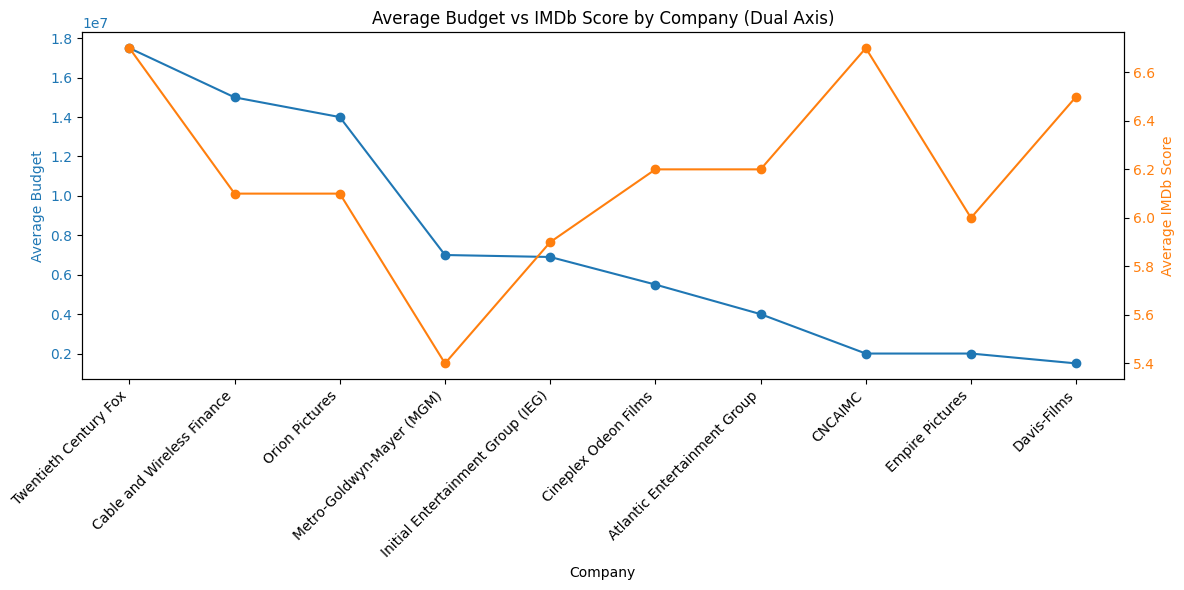

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

df_budget = df.dropna(subset=['company', 'budget'])
top10_budget_companies = (
    df_budget.groupby('company')['budget']
    .mean()
    .reset_index(name='avg_budget')
    .sort_values(by='avg_budget', ascending=False)
    .head(10)
)

company_score = (
    df[df['company'].isin(top10_budget_companies['company'])]
    .groupby('company')['score']
    .mean()
    .reset_index(name='avg_score')
)

combined = pd.merge(top10_budget_companies, company_score, on='company')
combined_sorted = combined.sort_values(by='avg_budget', ascending=False)


fig, ax1 = plt.subplots(figsize=(12, 6))


color = 'tab:blue'
ax1.set_xlabel('Company')
ax1.set_ylabel('Average Budget', color=color)
ax1.plot(combined_sorted['company'], combined_sorted['avg_budget'], marker='o', color=color, label='Average Budget')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(range(len(combined_sorted['company'])))
ax1.set_xticklabels(combined_sorted['company'], rotation=45, ha='right')


ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Average IMDb Score', color=color)
ax2.plot(combined_sorted['company'], combined_sorted['avg_score'], marker='o', color=color, label='Average IMDb Score')
ax2.tick_params(axis='y', labelcolor=color)


plt.title('Average Budget vs IMDb Score by Company (Dual Axis)')
fig.tight_layout()
plt.show()


**Exploratory Data Analysis for the effect of budget on IMDB rating.**

Hypothesis Test: Does average IMDb score differ by fine-grained budget group?
H₀: All budget groups have the same average IMDb score
H₁: At least one budget group has a different average IMDb score

ANOVA F-statistic: 0.0673
p-value: 0.804006

Conclusion: Since the p-value is greater than 0.05, we fail to reject the null hypothesis.
→ There is no statistically significant difference in IMDb scores across fine-grained budget groups.



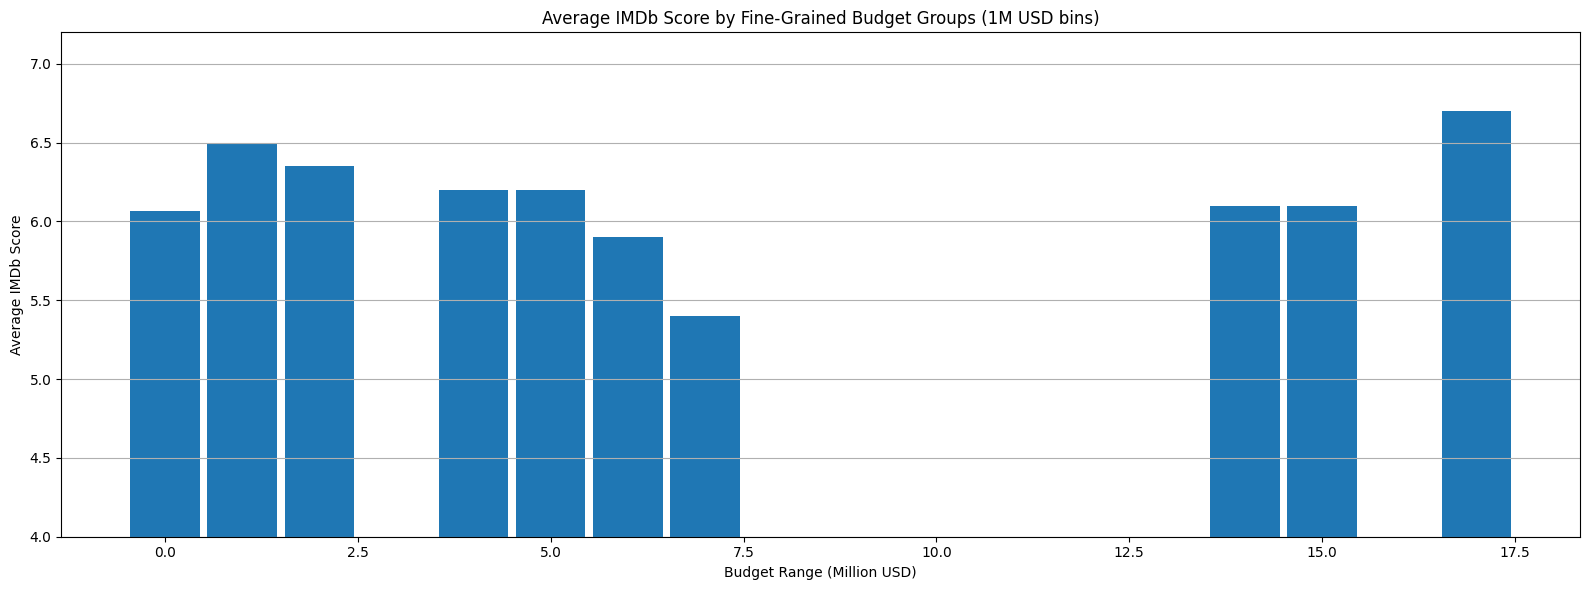

In [51]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

with open('/content/movies.csv', 'r', encoding='utf-8') as f:
    header = f.readline().strip().split(',')
df = pd.read_csv('/content/movies.csv', skiprows=1, names=header, on_bad_lines='skip')

df_plot = df[['budget', 'score']].dropna().copy()
df_plot['budget'] = pd.to_numeric(df_plot['budget'], errors='coerce')
df_plot['score'] = pd.to_numeric(df_plot['score'], errors='coerce')
df_plot = df_plot.dropna()


df_plot['budget_group_fine'] = (df_plot['budget'] / 1e6).astype(int)


print("Hypothesis Test: Does average IMDb score differ by fine-grained budget group?")
print("H₀: All budget groups have the same average IMDb score")
print("H₁: At least one budget group has a different average IMDb score\n")


groups_fine_budget = [group['score'].values for _, group in df_plot.groupby('budget_group_fine') if len(group) > 1]


anova_fine_budget = f_oneway(*groups_fine_budget)
f_stat_fine = anova_fine_budget.statistic
p_val_fine = anova_fine_budget.pvalue


print(f"ANOVA F-statistic: {f_stat_fine:.4f}")
print(f"p-value: {p_val_fine:.6f}\n")

if p_val_fine < 0.05:
    print("Conclusion: Since the p-value is less than 0.05, we reject the null hypothesis.")
    print("→ There is a statistically significant difference in IMDb scores across fine-grained budget groups.\n")
else:
    print("Conclusion: Since the p-value is greater than 0.05, we fail to reject the null hypothesis.")
    print("→ There is no statistically significant difference in IMDb scores across fine-grained budget groups.\n")


avg_scores_fine = df_plot.groupby('budget_group_fine')['score'].mean().reset_index()

plt.figure(figsize=(16, 6))
plt.bar(avg_scores_fine['budget_group_fine'], avg_scores_fine['score'], width=0.9)
plt.xlabel('Budget Range (Million USD)')
plt.ylabel('Average IMDb Score')
plt.title('Average IMDb Score by Fine-Grained Budget Groups (1M USD bins)')
plt.ylim(4, avg_scores_fine['score'].max() + 0.5)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**Exploratory Data Analysis for the rating distribution and their effect on IMDB scores**

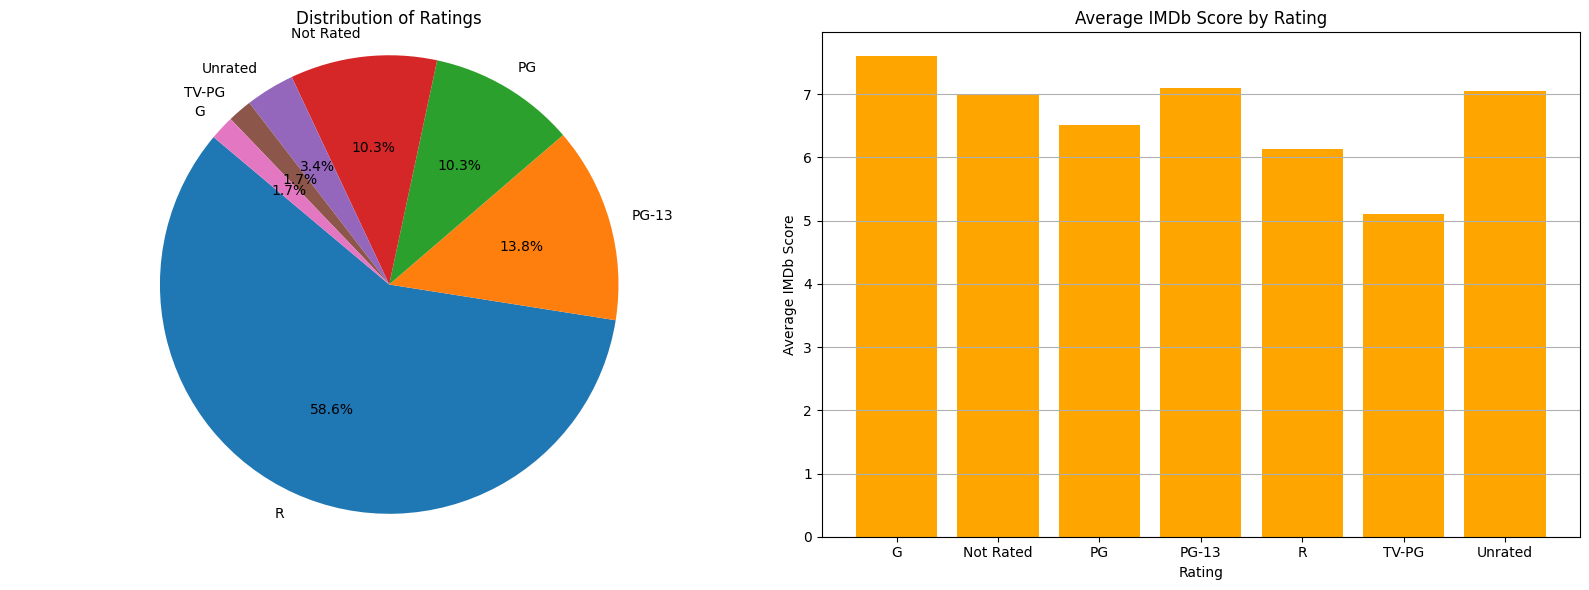

In [28]:

import pandas as pd
import matplotlib.pyplot as plt


with open('/content/movies.csv', 'r', encoding='utf-8') as f:
    header = f.readline().strip().split(',')

df_fixed = pd.read_csv('/content/movies.csv', skiprows=1, names=header, on_bad_lines='skip')

rating_counts = df_fixed['rating'].dropna().value_counts()


rating_avg_scores = df_fixed[['rating', 'score']].dropna()
rating_avg_scores['score'] = pd.to_numeric(rating_avg_scores['score'], errors='coerce')
rating_avg_scores = rating_avg_scores.dropna()
avg_score_per_rating = rating_avg_scores.groupby('rating')['score'].mean()


fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Distribution of Ratings')
axes[0].axis('equal')


axes[1].bar(avg_score_per_rating.index, avg_score_per_rating.values, color='orange')
axes[1].set_title('Average IMDb Score by Rating')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Average IMDb Score')
axes[1].grid(axis='y')

plt.tight_layout()
plt.show()


**Exploratory Data Analysis for the effect of production year on IMDB rating.**

Hypothesis Test: Does the 5-year release period affect the IMDb scores?
H₀ (Null Hypothesis): The average IMDb scores are the same across 5-year periods.
H₁ (Alternative Hypothesis): At least one 5-year period has a different average IMDb score.

ANOVA F-statistic: 4.9007
p-value: 0.004436



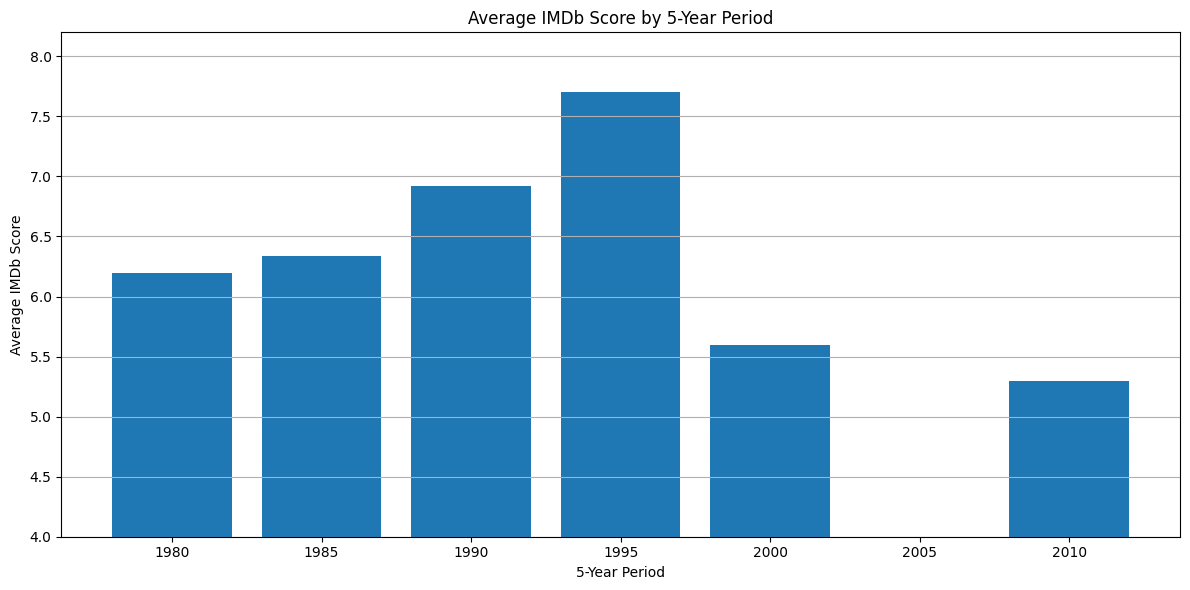

Conclusion: Since the p-value is less than 0.05, we reject the null hypothesis.
→ There is a statistically significant difference in IMDb scores across 5-year periods.


In [32]:

df_year_score['period'] = (df_year_score['year'] // 5 * 5).astype(int)


avg_scores_per_period = df_year_score.groupby('period')['score'].mean().reset_index()


groups_5y = [group['score'].values for _, group in df_year_score.groupby('period') if len(group) >= 5]


anova_result_5y = f_oneway(*groups_5y)
f_stat_5y = anova_result_5y.statistic
p_val_5y = anova_result_5y.pvalue


print("Hypothesis Test: Does the 5-year release period affect the IMDb scores?")
print("H₀ (Null Hypothesis): The average IMDb scores are the same across 5-year periods.")
print("H₁ (Alternative Hypothesis): At least one 5-year period has a different average IMDb score.\n")
print(f"ANOVA F-statistic: {f_stat_5y:.4f}")
print(f"p-value: {p_val_5y:.6f}\n")


plt.figure(figsize=(12, 6))
plt.bar(avg_scores_per_period['period'], avg_scores_per_period['score'], width=4)
plt.xlabel('5-Year Period')
plt.ylabel('Average IMDb Score')
plt.title('Average IMDb Score by 5-Year Period')
plt.ylim(4, avg_scores_per_period['score'].max() + 0.5)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


if p_val_5y < 0.05:
    print("Conclusion: Since the p-value is less than 0.05, we reject the null hypothesis.")
    print("→ There is a statistically significant difference in IMDb scores across 5-year periods.")
else:
    print("Conclusion: Since the p-value is greater than 0.05, we fail to reject the null hypothesis.")
    print("→ There is no statistically significant difference in IMDb scores across 5-year periods.")
